<a href="https://colab.research.google.com/github/DavidPuigV/Nuclio/blob/main/reinf_learn_epsilon_greedy_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Reinforced Learning con un multi-armed-bandid usando el algoritmo Epsilon-Greedy 

El primer ejemplo de reinforced learning que vamos a implementar. La idea es que relleneis los campos a partir de lo explicado en la primera parte.

## 1. Cargamos las librerias que necesitamos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Inicializamos las variables que queremos usar en el proyecto

- Numero de experimentos (pruebas)
- Valor de Epsilon
- Las probabilidades reales de los bandidos

In [2]:
NUM_PRUEBAS = 20000
PROBABILIDADES_BANDIDOS = [0.2 , 0.5, 0.75] 
EPS = 0.3

El primer bandido es el peor de todos, es decir, conseguiremos ganar dinero (recordad que son tragaperras) solo un 20% de las veces, cosa que el resto de bandidos son mejores

## 3. Definimos nuestra clase Bandido (la tragaperra)

Va a tener tres metodos: 
* El de creación **\_\_init\_\_** donde definiremos su ratio de exito (p), la media almacenada tras cada experimento (p_estimada), y el número total de veces que le hemos dado a la palanca (N)
* El de **ejecución** del experimento .pull() donde calculamos un valor random más la media
* El de **actualización** de los valores en caso de exito o fracaso en el experimento

In [3]:
class Bandit:
    def __init__(self, p):
        # Ratio de exito
        self.p = p # referencias al propio objeto
        # Media almacenada del ratio de exito de cada pull/experimento en un bandido
        self.p_estimada = 0  # TODO
        # Numero de pulls/experimentos en este bandido
        self.N = 0  # TODO
        # false 0 true 1
    
    def pull(self):
        # Devolvemos un booleano (True, False) con una probabilidad p (distribucion de Bernouilli)
        return np.random.random() < self.p
    
    def update(self, x):
        # Actualizamos los valores de mean y N, es decir, la media acumulada de exito, más el número de experimentos
        # Añadimos un experimento al bandido
        self.N += 1   # TODO
        
        # Recalculamos la media del bandido (tras desarrollar la regla de la media)
        self.p_estimada = (1./self.N)*((self.N-1)*self.p_estimada + x)   #TODO
        

## 4. Definimos el experimento
La funcion de realizar el experimento basada en el metodo epsilon-codicioso

* Creamos la lista de bandits a partir de los datos iniciales
* Almacenamos el número de premios entregados
* Inicializamos los contadores de ejecuciones de experimentos

Arrancamos un bucle sobre el número de experimentos usando el pseudo-codigo de Epsilon-Greedy

* Aplicamos el algoritmo para saber si exploramos o explotamos
* Las veces que acertamos el bandido de mejor probabilidad (el optimo)
* Tiramos de la palanca del bandit escogido
* Actualizamos las recompensas de ese bandit
* Almacenamos sus datos

Luego pintamos la evolución en el tiempo de las ejecuciones


In [4]:
def run_experiment():
    
    #Genero las tres tragaperras, los bandidos
    bandits = [Bandit(p) for p in PROBABILIDADES_BANDIDOS]
    
    #Genero un array vacío para la recolección de resultados
    premios = np.zeros(NUM_PRUEBAS)
    
    #Inicializo los contadores de ejecuciones de experimentos
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0   # numero de veces que he tirado la palanca del bandido optimo
    
    optimal_j = np.argmax([b.p for b in bandits]) 
       
    for i in range(NUM_PRUEBAS):
        
        # TODO Algoritmo de Epsilon Greedy

        if np.random.random() < EPS:
            jbandit = np.random.randint(len(bandits))
            num_times_explored +=1
        else:
            num_times_exploited +=1
            jbandit = np.argmax([b.p_estimada for b in bandits]) 

        if jbandit == optimal_j:
            num_optimal += 1
        
        # Con tragaperra escogida, le damos a la palanca haciendo un pull
        x = bandits[jbandit].pull()
        
        # Actualizamos el valor de la media de esa misma tragaperra, recordemos que x es un evento Bernouilli True o False 
        # Lo hemos de traducir a 1 o 0.
        if x:
            x = 1
        else:
            x = 0
        bandits[jbandit].update(x)
        
        # Almacenamos los datos para montar una grafica de evolución en el tiempo
        premios[i] = x
    
    # Calculamos la media acumulada de todos los experimentos
    ratio_exito = np.cumsum(premios) / (np.arange(NUM_PRUEBAS)+1)
    
    # Veamos los resultados
    print("Total recompensas conseguidas:", premios.sum())
    print("Media del ratio de exito:", premios.sum() / NUM_PRUEBAS)
    print("Total veces explorado:", num_times_explored)
    print("Total veces explotado:", num_times_exploited)
    
    
    # Número de veces que hemos explotado cada Bandit
    for b in bandits:
        print("Bandit con probabilidad real ", b.p ," se ha explotado :", b.N)
    
    # Pintamos los resultados
    plt.plot(ratio_exito)
    plt.plot(np.ones(NUM_PRUEBAS)*np.max(PROBABILIDADES_BANDIDOS))
    plt.xscale('log')
    plt.show()
    
    # Imprimimos el resultado en pantalla
    for b in bandits:
        print("Media Estimada de Exito:", b.p_estimada)


## 5. Parte principal del programa
Donde ejecutamos los tres experimentos

Total recompensas conseguidas: 13382.0
Media del ratio de exito: 0.6691
Total veces explorado: 6004
Total veces explotado: 13996
Bandit con probabilidad real  0.2  se ha explotado : 1955
Bandit con probabilidad real  0.5  se ha explotado : 2035
Bandit con probabilidad real  0.75  se ha explotado : 16010


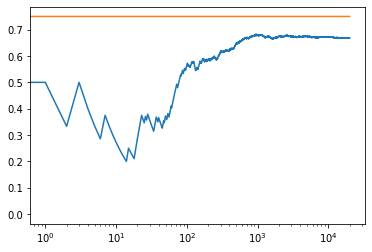

Media Estimada de Exito: 0.2010230179028129
Media Estimada de Exito: 0.5095823095823102
Media Estimada de Exito: 0.7465334166146165


In [5]:
# Parte principal del programa
if __name__ == '__main__':
    
    # Ejecutamos tres experimentos con distintos Epsilon
    run_experiment()
  
